<a href="https://colab.research.google.com/github/ilitteri/7512-AnalisisNumerico/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import optimize

In [ ]:
# Función auxiliar para imprimir iteraciones
def imprimir_iteraciones(iteraciones, cant_semillas = 1):
  print(*[f"Iteración {x} (semilla): {iteraciones[x]}" for x in range (0, cant_semillas)], sep = '\n')
  print(*[f"Iteracion {x}: {iteraciones[x] : 1.20f}, error: {abs(iteraciones[x-1] - iteraciones[x]) : 1.20f}" for x in range(cant_semillas, len(iteraciones))], sep = '\n')

# 2. Hallar $\pi$ por dos caminos


## (a) Algoritmos de Newton-Raphson

In [ ]:
TOL_CERO = 10e-30
def nr_sig_iter(ant_iter, funcion, derivada):
  divisor = derivada(ant_iter)
  if (abs(divisor) < TOL_CERO):
    raise ZeroDivisionError("Imposible calcular siguiente iteración de Newton Rhapson (Derivada vale 0)")

  return ant_iter - funcion(ant_iter)/divisor

def nr(funcion, derivada, semilla, max_iter = 1000, err = 0):
  lista = [semilla]
  for i in range(1, max_iter):
    lista.append(nr_sig_iter(lista[i-1], funcion, derivada))
    if (abs(lista[i-1] - lista[i]) <= err):
      break

  return np.array(lista)

## (b) Algoritmo de Leibniz

In [ ]:
def leibniz(iteraciones, tipo):
    pi = tipo(0.0)
    signo = tipo(1.0)
    for iteracion in range(1, iteraciones, 2):
        pi += signo / tipo(iteracion)
        signo *= tipo(-1.0)
    return pi * tipo(4)

## (c) Ejecutar los algoritmos anteriores con iteraciones $n=10, n=100, n=1000, n=10000, n=100000$ utilizando una representación de punto flotante de $32$ bits.

In [ ]:
ITERACIONES = [10, 100, 1000, 10000, 100000]

### Con Newton-Raphson

In [ ]:
  iteraciones_32 = nr(lambda x : np.sin(x), lambda x : np.cos(x), np.float64(3))

  print("Con punto flotante de 32 bits:")
  imprimir_iteraciones(iteraciones_32)

Con punto flotante de 32 bits:
Iteración 0 (semilla): 3.0
Iteracion 1:  3.14254654307427783166, error:  0.14254654307427783166
Iteracion 2:  3.14159265330047698939, error:  0.00095388977380084228
Iteracion 3:  3.14159265358979311600, error:  0.00000000028931612661
Iteracion 4:  3.14159265358979311600, error:  0.00000000000000000000


> No hicimos las siguientes iteraciones ya que el valor permanecía invariante desde la $4^{ta}$ iteración

### Con Leibniz

In [ ]:
print(*[f'{x} iteraciones: {leibniz(x, np.float32)}' for x in ITERACIONES], sep = '\n')

10 iteraciones: 3.3396823406219482
100 iteraciones: 3.121594190597534
1000 iteraciones: 3.1395931243896484
10000 iteraciones: 3.14139723777771
100000 iteraciones: 3.141575813293457


## (d) Ejecutar los algoritmos anteriores con iteraciones $n=10, n=100, n=1000, n=10000, n=100000$ utilizando una representación de punto flotante de $64$ bits.

### Con Newton-Raphson

In [ ]:
  iteraciones_64 = nr(lambda x : np.sin(x), lambda x : np.cos(x), np.float64(3))
  print("Con punto flotante de 64 bits:")
  imprimir_iteraciones(iteraciones_64)

Con punto flotante de 64 bits:
Iteración 0 (semilla): 3.0
Iteracion 1:  3.14254654307427783166, error:  0.14254654307427783166
Iteracion 2:  3.14159265330047698939, error:  0.00095388977380084228
Iteracion 3:  3.14159265358979311600, error:  0.00000000028931612661
Iteracion 4:  3.14159265358979311600, error:  0.00000000000000000000


### Con Leibniz

In [ ]:
print(*[f'{x} iteraciones: {leibniz(x, np.float64)}' for x in ITERACIONES], sep = '\n')

10 iteraciones: 3.3396825396825403
100 iteraciones: 3.121594652591011
1000 iteraciones: 3.139592655589785
10000 iteraciones: 3.141392653591791
100000 iteraciones: 3.1415726535897814


# 3. Búsqueda de raíces

$$
f_{1}(x) = x^2 - 2\\
f_{2}(x) = x^5 - 6.6 \cdot x^4 + 5.12 * x^2 - 38.016 \cdot x + 17.28\\
f_{3}(x) = (x-1.5) \cdot e^{(-4 \cdot (x-1.5)^{2})}
$$

In [ ]:
f1 = lambda x : x*x - 2  
f1_der = lambda x : 2*x
f1_der_2 = lambda x : 2
  
f2 = lambda x : x ** 5 - 6.6 * x ** 4 + 5.12 * x ** 3 + 21.312 * x **2 - 38.016 * x + 17.28
f2_der = lambda x : 5 * x ** 4 - 26.4 * x ** 3 + 15.36 * x ** 2 + 42.624 * x - 38.016
f2_der_2 = lambda x : 20 * x ** 3 - 79.2 * x ** 2 + 30.72 * x + 42.624

f3 = lambda x : (x - 1.5) * np.exp(-4 * (x - 1.5) ** 2)
f3_der = lambda x : np.exp(-4 * (x - 1.5) ** 2) * ((-8 * x + 12) * (x - 1.5) + 1)
f3_der_2 = lambda x : np.exp(-4 * (x - 1.5) ** 2) * (-24 * x + (x - 1.5) * (8 * x - 12) ** 2 + 36)

In [ ]:
INTERVALO = [0, 2]

## (a) Graficar las funciones $f_{1}(x), f_{2}(x), f_{3}(x)$ en el intervalo $[0, 2]$

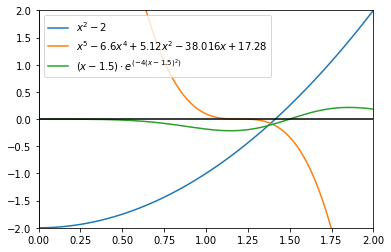

In [ ]:
x = np.linspace(0,2,num=1000)

plt.plot(x, list(map(f1, x)), label=r'$x^2 - 2$')
plt.plot(x, list(map(f2, x)), label=r'$x^5 - 6.6x^4 + 5.12x^2 - 38.016x + 17.28$')
plt.plot(x, list(map(f3, x)), label=r'$(x-1.5) \cdot e^{(-4(x-1.5)^{2})}$')

plt.axhline(0, color="black")
plt.axvline(0, color="black")

plt.xlim(INTERVALO)
plt.ylim(-2, 2)

plt.legend()
plt.show()

## (b) Hallar las raices de las funciones $f_{1}(x), f_{2}(x), f_{3}(x)$ en el intervalo $[0, 2]$ con los métodos de  Bisección, Newton-Raphson, Newton-Raphson modificado y Secante.

### Algoritmo de Bisección

In [ ]:
def biseccion(funcion, q0, q1, max_iter = 1000, err = 0):
  contador = 1
  lista = [q0, q1]

  while abs(lista[contador] - lista[contador-1]) > err:
    q2 = (q0 + q1) / 2 
    if funcion(q0) * funcion(q2) <= 0:
      q1 = q2
      lista.append(q1)
    else:
      q0 = q2
      lista.append(q0)
    contador = contador + 1
    if (contador >= max_iter):
      break

  return np.array(lista)

### Algoritmo de Newton Rhapson Modificado

In [ ]:
def nr_mod_sig_iter(ant_iter, funcion, derivada, derivada_2):
  divisor = derivada(ant_iter) ** 2 - funcion(ant_iter) * derivada_2(ant_iter)
  if (abs(divisor) < TOL_CERO):
    raise ZeroDivisionError("Imposible calcular siguiente iteración de Newton Rhapson Modificado (Divisor vale 0)")

  return ant_iter - funcion(ant_iter) * derivada(ant_iter) / divisor


def nr_mod(funcion, derivada, derivada_2, semilla, max_iter = 1000, err = 0):
  lista = [semilla]
  for i in range(1, max_iter):
    lista.append(nr_mod_sig_iter(lista[i-1], funcion, derivada, derivada_2))
    if (abs(lista[i-1] - lista[i]) <= err):
      break

  return np.array(lista)

### Algoritmo de Secante

In [ ]:
def secante(f, a, b, N, error):
    p = [a, b]
    p_n = lambda f, n, p: p[n-1] - ((f(p[n-1]) * (p[n-1] - p[n-2])) / (f(p[n-1]) - f(p[n-2])))
    for n in range(2, N-1):
        p.append(p_n(f, n, p))
        if abs(p[n-1] - p[n]) <= error:
            break
                
    return np.array(p)

In [ ]:
# Cotas de error
ERRORES = [1e-5, 1e-13]
# Funciones a evaluar
FUNCIONES = [f1, f2, f3]
FUNCIONES_DER = [f1_der, f2_der, f3_der]
FUNCIONES_DER_2 = [f1_der_2, f2_der_2, f3_der_2]
# Iteraciones
N = 20
# Mensajes
STR_ERRORES = ['10^(-5)', '10^(-13)']
STR_FUNCIONES = ['x**2 - 2', 'x**5 - 6.6 * x**4 + 5.12 * x**2 - 38.016 * x + 17.28', '(x - 1.5) * np.exp(-4 * (x - 1.5)**2)']
# Resultados
resultados_raices = {'biseccion': {}, 'newton_raphson': {}, 'newton_raphson_m': {}, 'secante': {}}

### Por Bisección

In [96]:
for i, f in enumerate(FUNCIONES):
    for j, e in enumerate(ERRORES):
        resultados_raices['biseccion'][f'{i+1}'] = biseccion(f, INTERVALO[0], INTERVALO[1], N, e)
        print(f'Funcion {STR_FUNCIONES[i]} con error de {STR_ERRORES[j]}')
        imprimir_iteraciones(resultados_raices['biseccion'][f'{i+1}'], cant_semillas = 2)

Funcion x**2 - 2 con error de 10^(-5)
Iteración 0 (semilla): 0.0
Iteración 1 (semilla): 2.0
Iteracion 2:  1.00000000000000000000, error:  1.00000000000000000000
Iteracion 3:  1.50000000000000000000, error:  0.50000000000000000000
Iteracion 4:  1.25000000000000000000, error:  0.25000000000000000000
Iteracion 5:  1.37500000000000000000, error:  0.12500000000000000000
Iteracion 6:  1.43750000000000000000, error:  0.06250000000000000000
Iteracion 7:  1.40625000000000000000, error:  0.03125000000000000000
Iteracion 8:  1.42187500000000000000, error:  0.01562500000000000000
Iteracion 9:  1.41406250000000000000, error:  0.00781250000000000000
Iteracion 10:  1.41796875000000000000, error:  0.00390625000000000000
Iteracion 11:  1.41601562500000000000, error:  0.00195312500000000000
Iteracion 12:  1.41503906250000000000, error:  0.00097656250000000000
Iteracion 13:  1.41455078125000000000, error:  0.00048828125000000000
Iteracion 14:  1.41430664062500000000, error:  0.00024414062500000000
Iterac

### Por Newton-Rhapson

In [97]:
for i, f in enumerate(FUNCIONES):
    for j, e in enumerate(ERRORES):
        resultados_raices['newton_raphson'][f'{i+1}'] = nr(f, FUNCIONES_DER[i], np.float64(1) if i < 2 else np.float64(1.3), err=e)
        print(f'Funcion {STR_FUNCIONES[i]} con error de {STR_ERRORES[j]}')
        imprimir_iteraciones(resultados_raices['newton_raphson'][f'{i+1}'])

Funcion x**2 - 2 con error de 10^(-5)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.50000000000000000000, error:  0.50000000000000000000
Iteracion 2:  1.41666666666666674068, error:  0.08333333333333325932
Iteracion 3:  1.41421568627450988664, error:  0.00245098039215685404
Iteracion 4:  1.41421356237468986983, error:  0.00000212389982001682
Funcion x**2 - 2 con error de 10^(-13)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.50000000000000000000, error:  0.50000000000000000000
Iteracion 2:  1.41666666666666674068, error:  0.08333333333333325932
Iteracion 3:  1.41421568627450988664, error:  0.00245098039215685404
Iteracion 4:  1.41421356237468986983, error:  0.00000212389982001682
Iteracion 5:  1.41421356237309514547, error:  0.00000000000159472435
Iteracion 6:  1.41421356237309492343, error:  0.00000000000000022204
Funcion x**5 - 6.6 * x**4 + 5.12 * x**2 - 38.016 * x + 17.28 con error de 10^(-5)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.06703910614525421252, error:  0.06703910614525421252
I

### Por Newton-Rhapson Modificado

In [98]:
for i, f in enumerate(FUNCIONES):
    for j, e in enumerate(ERRORES):
        resultados_raices['newton_raphson_m'][f'{i+1}'] = nr_mod(f, FUNCIONES_DER[i], FUNCIONES_DER_2[i], np.float64(1) if i < 2 else np.float64(1.2), err=e)
        print(f'Funcion {STR_FUNCIONES[i]} con error de {STR_ERRORES[j]}')
        imprimir_iteraciones(resultados_raices['newton_raphson_m'][f'{i+1}'])

Funcion x**2 - 2 con error de 10^(-5)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.33333333333333325932, error:  0.33333333333333325932
Iteracion 2:  1.41176470588235281056, error:  0.07843137254901955124
Iteracion 3:  1.41421143847487007505, error:  0.00244673259251726449
Iteracion 4:  1.41421356237150019908, error:  0.00000212389663012402
Funcion x**2 - 2 con error de 10^(-13)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.33333333333333325932, error:  0.33333333333333325932
Iteracion 2:  1.41176470588235281056, error:  0.07843137254901955124
Iteracion 3:  1.41421143847487007505, error:  0.00244673259251726449
Iteracion 4:  1.41421356237150019908, error:  0.00000212389663012402
Iteracion 5:  1.41421356237309492343, error:  0.00000000000159472435
Iteracion 6:  1.41421356237309514547, error:  0.00000000000000022204
Funcion x**5 - 6.6 * x**4 + 5.12 * x**2 - 38.016 * x + 17.28 con error de 10^(-5)
Iteración 0 (semilla): 1.0
Iteracion 1:  1.19842956120094923378, error:  0.19842956120094923378
I

### Por Secante

In [99]:
for i, f in enumerate(FUNCIONES):
    for j, e in enumerate(ERRORES):
        resultados_raices['secante'][f'{i+1}'] = secante(f, INTERVALO[0], INTERVALO[1], N, e)
        print(f'Funcion {STR_FUNCIONES[i]} con error de {STR_ERRORES[j]}')
        imprimir_iteraciones(resultados_raices['secante'][f'{i+1}'], cant_semillas=2)

Funcion x**2 - 2 con error de 10^(-5)
Iteración 0 (semilla): 0.0
Iteración 1 (semilla): 2.0
Iteracion 2:  1.00000000000000000000, error:  1.00000000000000000000
Iteracion 3:  1.33333333333333325932, error:  0.33333333333333325932
Iteracion 4:  1.42857142857142860315, error:  0.09523809523809534383
Iteracion 5:  1.41379310344827580082, error:  0.01477832512315280233
Iteracion 6:  1.41421143847487007505, error:  0.00041833502659427424
Iteracion 7:  1.41421356268886966312, error:  0.00000212421399958806
Funcion x**2 - 2 con error de 10^(-13)
Iteración 0 (semilla): 0.0
Iteración 1 (semilla): 2.0
Iteracion 2:  1.00000000000000000000, error:  1.00000000000000000000
Iteracion 3:  1.33333333333333325932, error:  0.33333333333333325932
Iteracion 4:  1.42857142857142860315, error:  0.09523809523809534383
Iteracion 5:  1.41379310344827580082, error:  0.01477832512315280233
Iteracion 6:  1.41421143847487007505, error:  0.00041833502659427424
Iteracion 7:  1.41421356268886966312, error:  0.00000212

##c)

In [ ]:
print(f"Raiz de f1 segun SciPy: {optimize.brentq(f1, 0, 2)}")
print(f"Raiz de f2 segun SciPy: {optimize.brentq(f2, 0, 2)}")
print(f"Raiz de f3 segun SciPy: {optimize.brentq(f3, 0, 2)}")

Raiz de f1 segun SciPy: 1.4142135623731364
Raiz de f2 segun SciPy: 1.2000081652661798
Raiz de f3 segun SciPy: 1.5000000000000198


##d)

In [147]:
# Titulos
TITULOS = {
    'biseccion': 'Orden de Convergencia\n Metodo Biseccion',
    'newton_raphson': 'Orden de Convergencia\n Metodo Newton-Raphson',
    'newton_raphson_m': 'Orden de Convergencia\n Metodo Newton-Raphson Modificado',
    'secante': 'Orden de Convergencia\n Metodo Secante'
}

# Funciones LaTeX
LATEX_FUNCIONES = [
    r'$x^2 - 2$',
    r'$x^5 - 6.6x^4 + 5.12x^2 - 38.016x + 17.28$',
    r'$(x-1.5) \cdot e^{(-4(x-1.5)^{2})}$'
]

### Algoritmo para calcular el orden de convergencia por iteración

In [79]:
def ordenes_convergencia(iteraciones):
  ordenes = []
  for i in range(2, len(iteraciones) - 1):
    num = np.log(abs((iteraciones[i + 1] - iteraciones[i]) / (iteraciones[i] - iteraciones[i - 1])))
    den = np.log(abs((iteraciones[i] - iteraciones[i - 1]) / (iteraciones[i - 1] - iteraciones[i - 2])))
    ordenes.append(num / den)
  return ordenes

### Orden de bisección

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


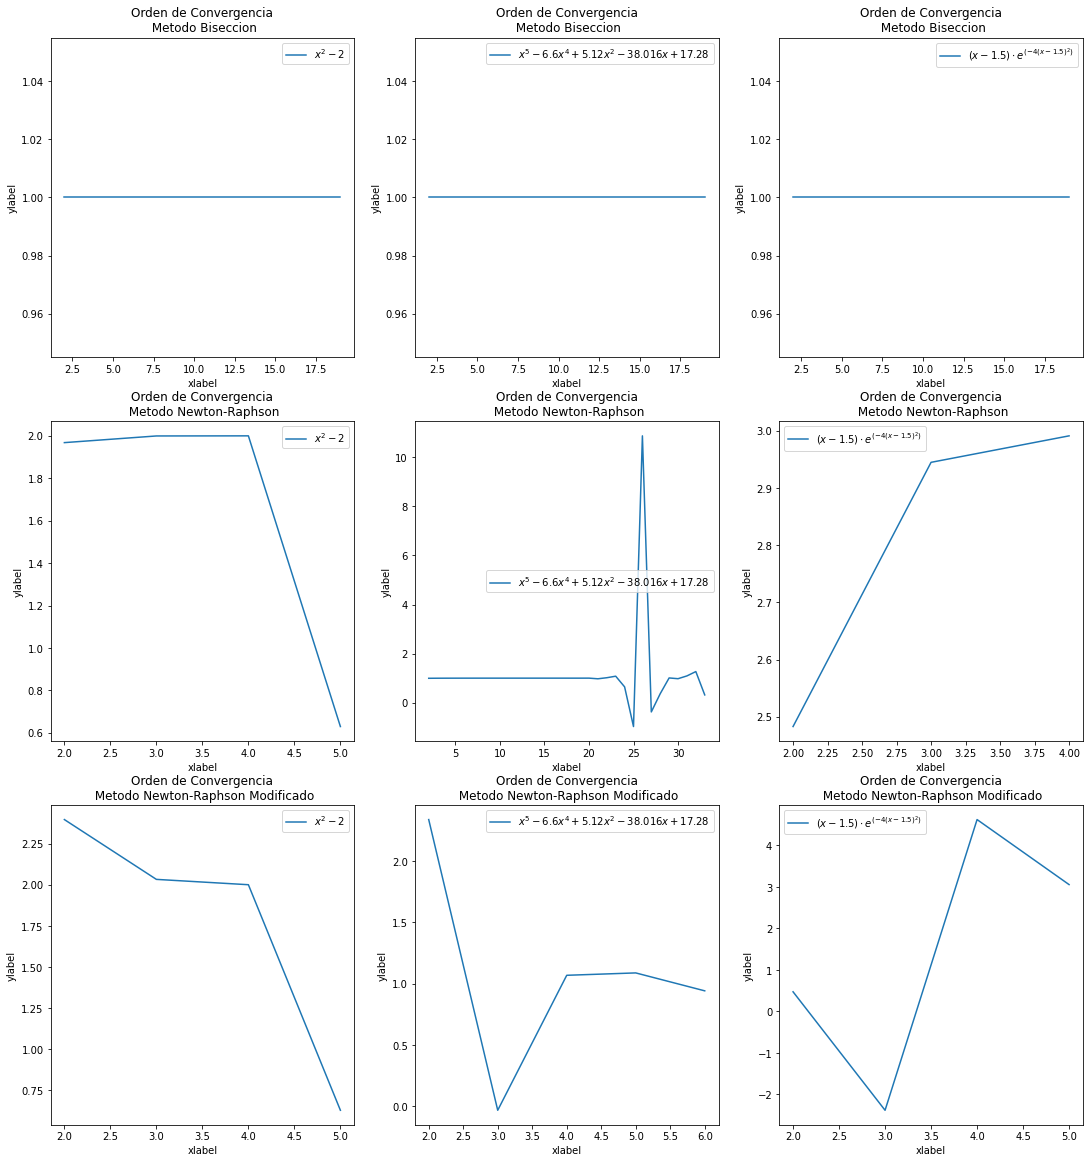

In [149]:
fig, ax = plt.subplots(3, 3, figsize=(18.5, 20))

metodos = list(resultados_raices.keys())
for j in range(3):
  for i in range(3):
    ordenes = ordenes_convergencia(resultados_raices[metodos[i]][str(j+1)])
    ax[i][j].set_title(TITULOS[metodos[i]])
    ax[i][j].plot(range(2, len(resultados_raices[metodos[i]][str(j+1)]) - 1), ordenes, label=LATEX_FUNCIONES[j])
    ax[i][j].set_xlabel('xlabel')
    ax[i][j].set_ylabel('ylabel')
    ax[i][j].legend()
